In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

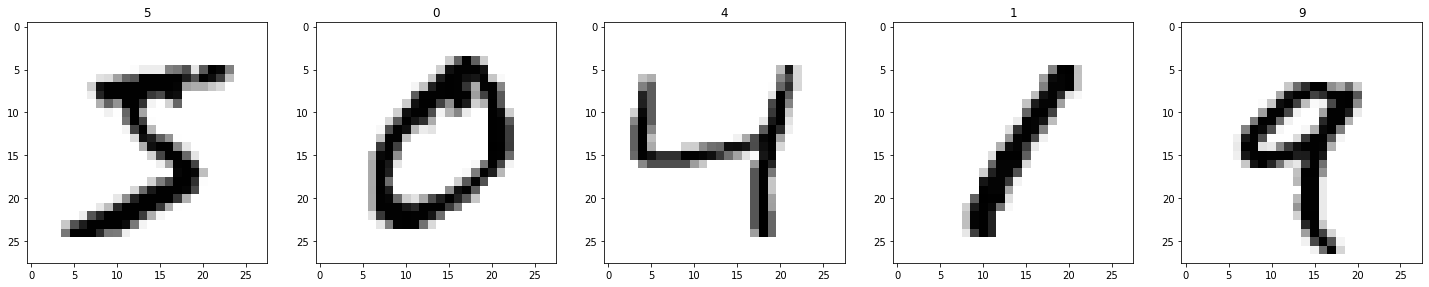

In [3]:
#Plot the first 5 images
fig,axs=plt.subplots(1,5,figsize=(25,15))
for i in range (5):
    axs[i].imshow(X_train[i],cmap="binary")
    axs[i].set_title(y_train[i])
    

Scale the images to improve the accuracy of our model 

In [4]:
X_train = X_train/255
X_test = X_test/255

Convert images from 28*28 matrix to single vector 

In [5]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

Define our neural network




In [6]:
from tensorflow.python import metrics
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7821 - accuracy: 0.8105
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4574 - accuracy: 0.8804
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4040 - accuracy: 0.8910
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8966
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3602 - accuracy: 0.9009


In [7]:
model.evaluate (X_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3371 - accuracy: 0.9089


[0.3371122181415558, 0.9089000225067139]

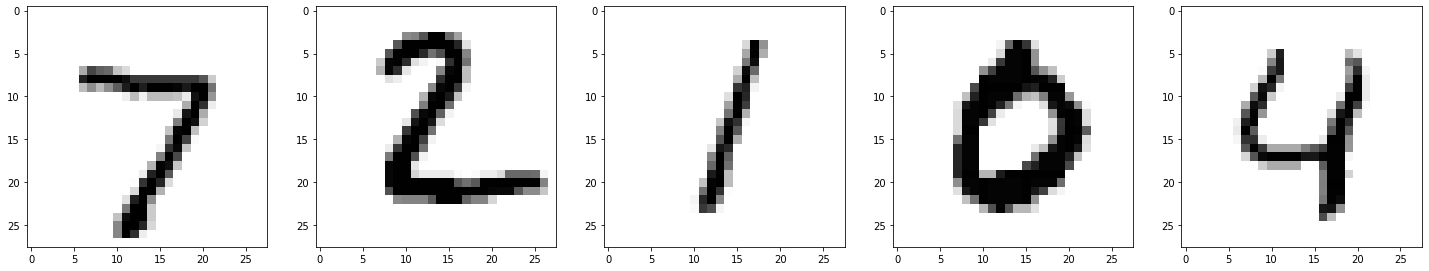

In [8]:
fig,axs=plt.subplots(1,5,figsize=(25,15))
for i in range (5):
    axs[i].imshow(X_test[i],cmap="binary")

In [9]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [10]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

Text(69.0, 0.5, 'True label')

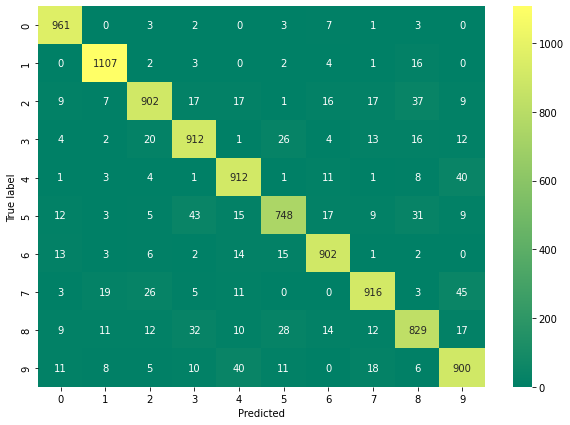

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,cmap = 'summer', annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True label')

In [12]:
model = keras.Sequential([
    # add one hidden layer to improve preformans of our model
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6529 - accuracy: 0.8341
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3395 - accuracy: 0.9052
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2906 - accuracy: 0.9184
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9265
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9329
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2222 - accuracy: 0.9378
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2072 - accuracy: 0.9419
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1945 - accuracy: 0.9454
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1829 - accuracy: 0.9487
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.173

In [13]:
model.evaluate (X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1686 - accuracy: 0.9500


[0.1685524582862854, 0.949999988079071]

Text(69.0, 0.5, 'True label')

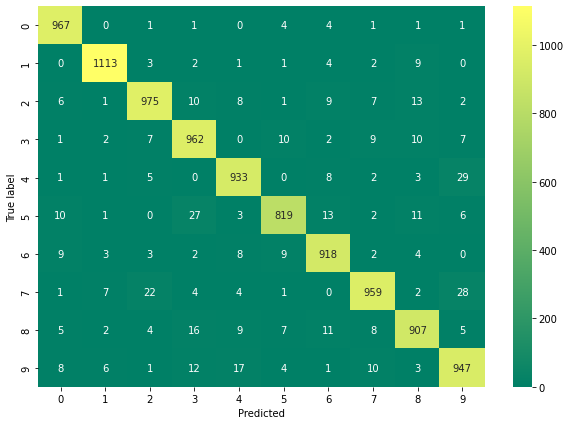

In [14]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm,cmap = 'summer', annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True label')